In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

insurance = pd.read_csv('insurance.csv')
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


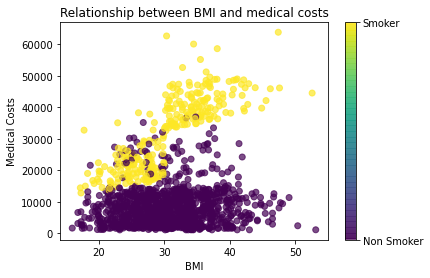

In [3]:
plt.scatter(insurance.loc[:,"bmi"], insurance.loc[:,"charges"], c= insurance.loc[:,"smoker"] , alpha = 0.7 )
cbar = plt.colorbar(ticks =[0,1] )
cbar.set_ticklabels(["Non Smoker", "Smoker"])
plt.xlabel("BMI")
plt.ylabel ("Medical Costs")
plt.title ("Relationship between BMI and medical costs")
plt.show()


For non smokers, medical costs seem to be fixed irrespective of increase in bmi. For smokers, medical costs appear to increase with bmi.

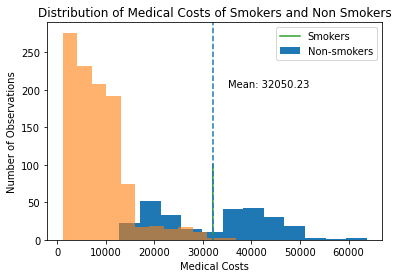

In [128]:
smoker_mean = insurance.loc[insurance.loc[:,"smoker"]==1, "charges"].mean()
plt.hist (insurance.loc[insurance.loc[:,"smoker"]==1, "charges"], 12)
plt.hist (insurance.loc[insurance.loc[:,"smoker"]==0, "charges"], 12, alpha =0.6)
plt.plot([smoker_mean,smoker_mean+10], [0, 100])
plt.ylabel ("Number of Observations")
plt.xlabel ("Medical Costs")
plt.title ("Distribution of Medical Costs of Smokers and Non Smokers")
plt.legend (["Smokers", "Non-smokers"])
min_ylim, max_ylim = plt.ylim()
plt.axvline(x=smoker_mean, linestyle ='dashed')
plt.text(smoker_mean*1.1, max_ylim*0.7, 'Mean: {:.2f}'.format(smoker_mean))
plt.show()


The medical costs of most non smokers mostly appears to be lower than medical costs of most smokers

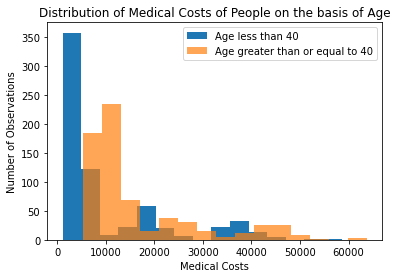

In [16]:
plt.hist (insurance.loc[insurance.loc[:,"age"]<40, "charges"], 15)
plt.hist (insurance.loc[insurance.loc[:,"age"]>=40, "charges"], 15, alpha =0.7)
plt.ylabel ("Number of Observations")
plt.xlabel ("Medical Costs")
plt.title ("Distribution of Medical Costs of People on the basis of Age")
plt.legend (["Age less than 40", "Age greater than or equal to 40"])
plt.show()

The medical costs for most of those with age less than 40 is lower than the medical costs of most of those with age greater than 40.

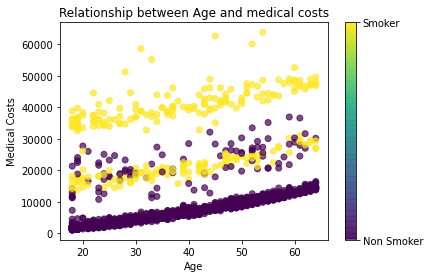

In [62]:
plt.scatter(insurance.loc[:,"age"], insurance.loc[:,"charges"], c= insurance.loc[:,"smoker"] , alpha = 0.7 )
cbar = plt.colorbar(ticks =[0,1] )
cbar.set_ticklabels(["Non Smoker", "Smoker"])
plt.xlabel("Age")
plt.ylabel ("Medical Costs")
plt.title ("Relationship between Age and medical costs")
plt.show()

The medical costs appear to have a linear relationship with age. Another point to note from the graph is that the medical costs of smokers is significantly higher than the medical  cost of smokers.

In [81]:
men_average = [insurance.loc[np.logical_and (insurance.loc[:,"sex"]==0,insurance.loc[:,"children"]==0), "charges"].mean(),
insurance.loc[np.logical_and (insurance.loc[:,"sex"]==0,insurance.loc[:,"children"]==1), "charges"].mean(),
insurance.loc[np.logical_and (insurance.loc[:,"sex"]==0,insurance.loc[:,"children"]==2), "charges"].mean(),
insurance.loc[np.logical_and (insurance.loc[:,"sex"]==0,insurance.loc[:,"children"]==3), "charges"].mean(),
insurance.loc[np.logical_and (insurance.loc[:,"sex"]==0,insurance.loc[:,"children"]==4), "charges"].mean(),
insurance.loc[np.logical_and (insurance.loc[:,"sex"]==0,insurance.loc[:,"children"]==5), "charges"].mean()]

women_average = [insurance.loc[np.logical_and (insurance.loc[:,"sex"]==1,insurance.loc[:,"children"]==0), "charges"].mean(),
insurance.loc[np.logical_and (insurance.loc[:,"sex"]==1,insurance.loc[:,"children"]==1), "charges"].mean(),
insurance.loc[np.logical_and (insurance.loc[:,"sex"]==1,insurance.loc[:,"children"]==2), "charges"].mean(),
insurance.loc[np.logical_and (insurance.loc[:,"sex"]==1,insurance.loc[:,"children"]==3), "charges"].mean(),
insurance.loc[np.logical_and (insurance.loc[:,"sex"]==1,insurance.loc[:,"children"]==4), "charges"].mean(),
insurance.loc[np.logical_and (insurance.loc[:,"sex"]==1,insurance.loc[:,"children"]==5), "charges"].mean()]


print (men_average)
print (women_average)


[12832.696735684209, 13273.522457710846, 16187.095324876042, 16789.167418500005, 13782.28482857143, 7931.658310000001]
[11905.714275671282, 12161.360414367084, 13941.317326386554, 13865.605066363636, 13937.674561818181, 9854.00641875]


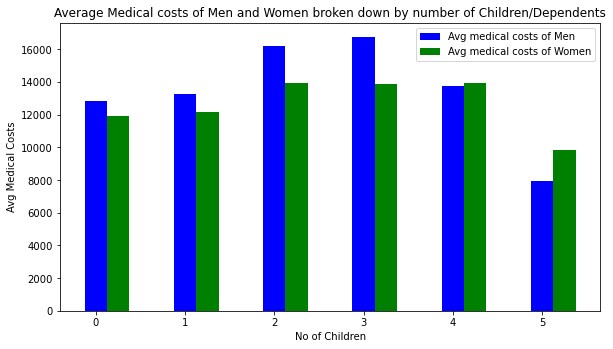

In [98]:

X = np.arange(6)
fig = plt.figure()
ax = fig.add_axes([0,0,1.25,1])
ax.bar(X + 0.00, men_average, color = 'b', width = 0.25)
ax.bar(X + 0.25, women_average, color = 'g', width = 0.25)
plt.legend(["Avg medical costs of Men", "Avg medical costs of Women"])
plt.xlabel ("No of Children")
plt.ylabel("Avg Medical Costs")
plt.title ("Average Medical costs of Men and Women broken down by number of Children/Dependents")
plt.show()


It can be seen that for fewer children (less than or equal to 3), the average medical costs of men is greater than the average medical costs of women. This trend reverses itself when the number of children is greater than 3 as shown by the graph. The average medical costs of women becomes greater than the average medical costs for men in this case.
